In [56]:
import numpy as np
import sklearn.datasets
import matplotlib . pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV ,train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state

# data loading
train_samples = 500
X, y = fetch_openml('mnist_784', version =1, return_X_y =True ,as_frame = False )
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0],-1))
X_train , X_test , y_train , y_test = train_test_split(X, y,train_size = train_samples,test_size =100)

C:\Python39\cv\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [60]:
# creating a pipeline
pipeline = Pipeline([('scaler', StandardScaler()),('hyperparameter', LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))])

# create a parameter grid for storing hyperparameter values for hyperparameter tuning
param_grid = {'hyperparameter__C': np.logspace(-2, 2, 9)}

# create a GridSearchCV object to tune the hyperparameter and train the Lasso logistic regression model
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# train the model using the training data
grid_search.fit(X_train, y_train)

# get the best model
best_model = grid_search.best_estimator_
# evaluate the model on the test set
y_pred = best_model.predict(X_test)

C:\Python39\cv\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Optimized hyper parameter value is:  0.31622776601683794


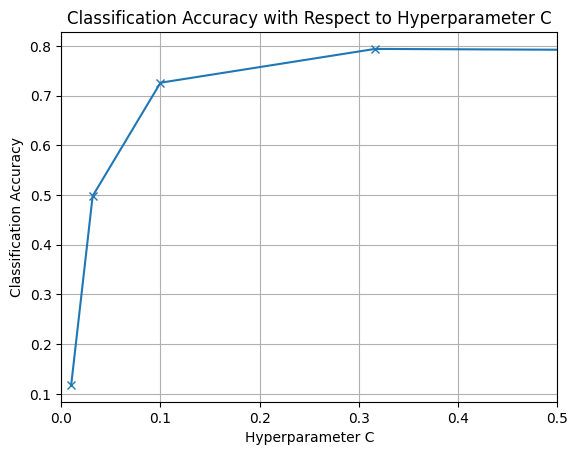

In [63]:
# Get the best hyperparameter value
best_C = grid_search.best_params_['hyperparameter__C']
print('Optimized hyper parameter value is: ',best_C)

# plot the classification accuracy with respect to hyperparameter C
plt.plot(grid_search.param_grid['hyperparameter__C'], grid_search.cv_results_['mean_test_score'],marker='x')
plt.xlabel('Hyperparameter C')
plt.ylabel('Classification Accuracy')
plt.title('Classification Accuracy with Respect to Hyperparameter C')
plt.xlim(0,0.5)
plt.grid(True)
plt.show()

In [62]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# get the best model
best_model = grid_search.best_estimator_
# evaluate the model on the test set
y_pred = best_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

# calculate the precision, recall, and F1-score
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1_score = f1_score(y_test, y_pred,average='weighted')

# print the results
print('Confusion matrix:')
print(confusion_matrix)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)

Confusion matrix:
[[11  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  1  0]
 [ 0  0  0 12  0  1  0  1  0  1]
 [ 0  0  0  0  8  0  0  0  0  2]
 [ 0  1  1  0  1  4  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  0  1  0  0  0  0 11  0  2]
 [ 0  0  1  0  0  0  0  0  7  2]
 [ 0  0  0  0  0  1  0  1  0 11]]
Precision: 0.8495726495726497
Recall: 0.83
F1-score: 0.8328819595982284


In [71]:
w0 = -6
w1 = 0.05
w2 = 1
x1 = 40
x2 = 3.5

probability = 1 / (1 + np.exp(-(w0 + w1 * x1 + w2 * x2)))
print(f"The estimated probability is: {probability:.2f}")

x1=(6-3.5)/0.05
print('Hours: ',x1)

The estimated probability is: 0.38
Hours:  36.13705638880109


In [68]:
2.5-np.log(2)

1.8068528194400546